# Laptop Price Predictor

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv(r"C:\Users\yasha\Desktop\laptop_data.csv")

This is how our data looks like.

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.duplicated().sum()

0

So by looking at this data and performing some initial functions we can see that most of the data is clean --> there are no null values or duplicated values. However some limitations are there.


Limitations -
* Data is very small.
* More than 1 type of information in single column like 'Screen Resolution', 'Memory' etc.

## Data Cleaning
* Removing unnecessary columns.
* Changing our 'Ram' and ' Weight' columns as per the requirement

In [ ]:
df = df.drop(columns = ['Unnamed: 0'], axis = 1)

In [ ]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].astype(float)

In [ ]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


# EDA

Doing Univariate and Multivariate analysis on the columns.
* Univariate analysis on our target variable
* multivariate analysis on our independent variables to find the correlation with target variable

In [ ]:
import seaborn as sns

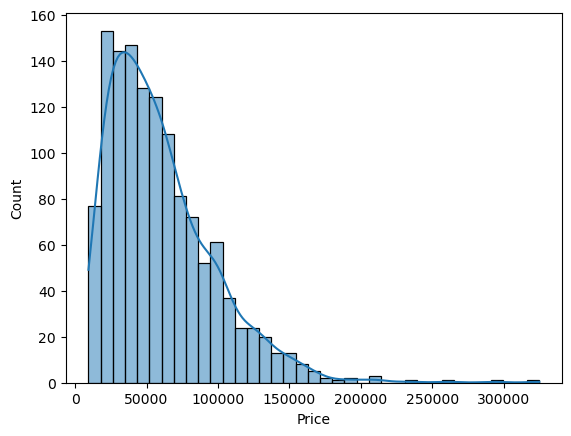

In [ ]:
sns.histplot(df['Price'], kde = True);
# data is right skewed

#### Univariate & Multivariate analysis on Company and Price column

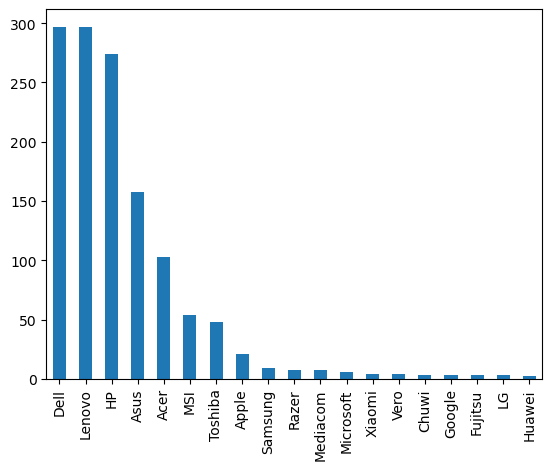

In [ ]:
df['Company'].value_counts().plot(kind = 'bar');

* Dell and Lenovo are the Company which has major market share, closely followed by HP and then Asus and so on.
* There are some companies which has sold very less laptops

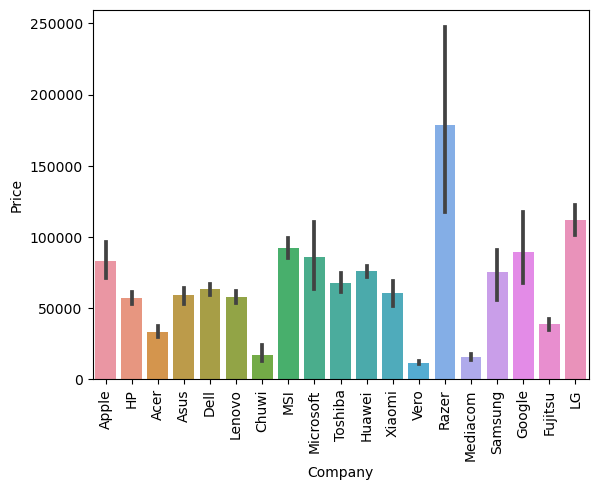

In [ ]:
import matplotlib.pyplot as plt

sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Univariate and Multivariate analysis on Typename and Price columns

<Axes: >

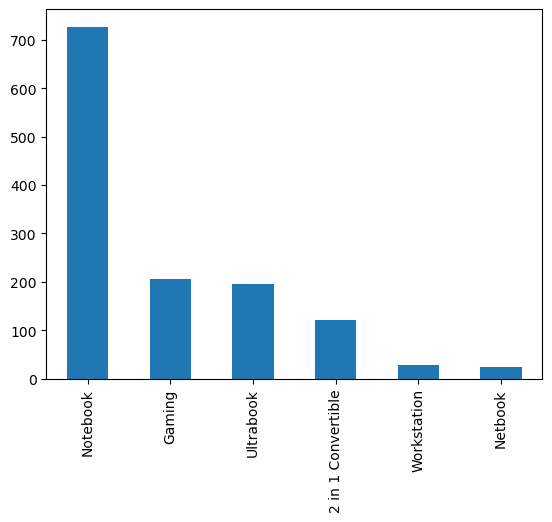

In [ ]:
df['TypeName'].value_counts().plot(kind = 'bar')

* most sold type of laptop is Notebook.
* least sold type of laptop is Netbook

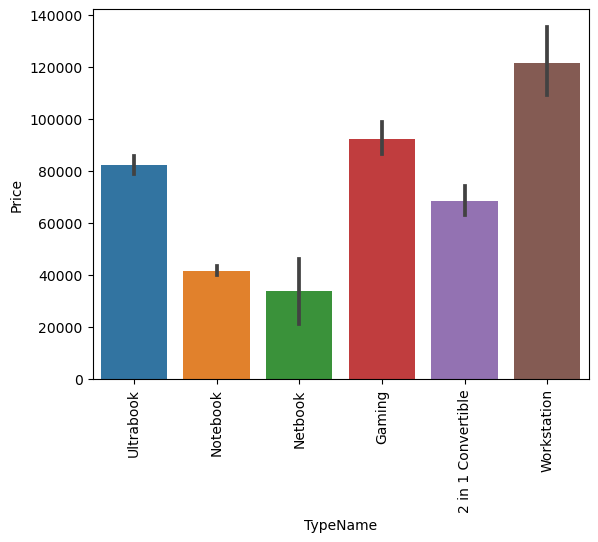

In [ ]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

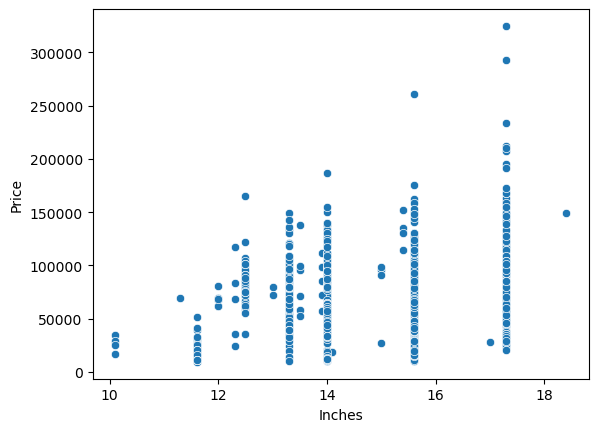

In [ ]:
sns.scatterplot(x = df['Inches'], y = df['Price']);

* By analysing Inches column we cannot see much relation with price. Data is not showing any kind pattern

### Feature Extraction and analysis of 'ScreenResolution' column

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

* In Screen Resolution column, we can see lot of hidden information such as Touchscreen, IPS Display and at the end we can see screen resolution.
* Extracting this information and making new columns
* Multivariate Analysis on these columns with Price

In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: >

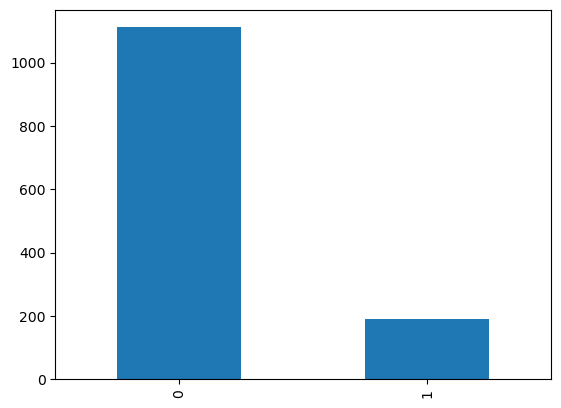

In [ ]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

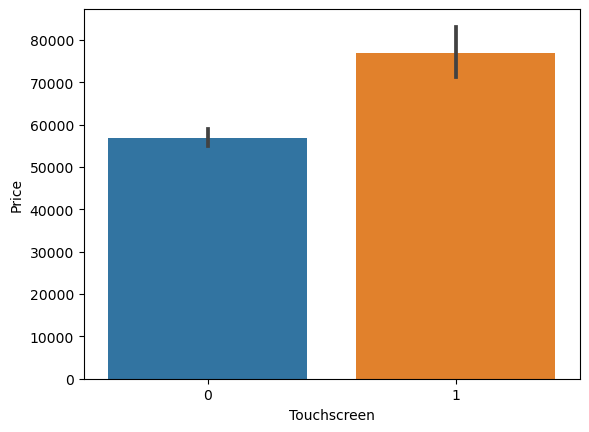

In [ ]:
sns.barplot(x = df['Touchscreen'], y = df['Price']);

* Majority of the laptops sold are not touchscreen but we can see a direct relation with price.
* Touchscreen laptops are more costly than normal laptops

In [ ]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: >

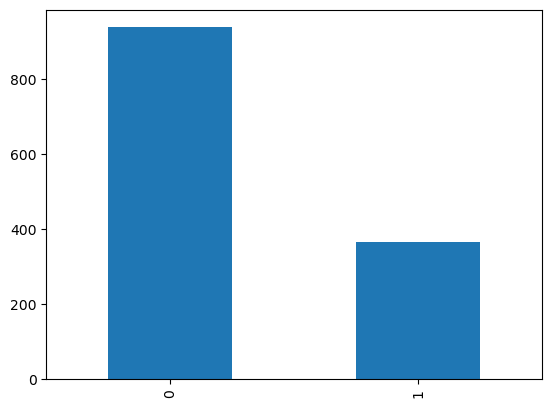

In [ ]:
df['Ips'].value_counts().plot(kind = 'bar')

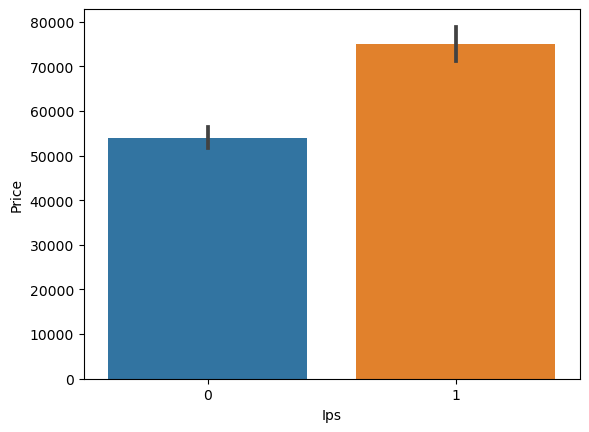

In [ ]:
sns.barplot(x = df['Ips'], y = df['Price']);

* Almost like touchscreen --> IPS Display costs more but moajority sold laptops are normal

##### Extracting x resolution and y resolution

In [ ]:
new = df['ScreenResolution'].str.split('x', n = 1, expand = True)

In [ ]:
df['x_res'] = new[0]
df['y_res'] = new[1]

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
615,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,62231.040,0,0,Full HD 1920,1080
872,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,73952.640,0,1,IPS Panel Full HD 1920,1080
642,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.14,130536.000,0,1,IPS Panel Full HD 1920,1080
459,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.50,34093.872,0,0,1600,900
131,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,23922.720,0,0,Full HD 1920,1080


In [ ]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+.?\d+)').apply(lambda x:x[0])
# Using findall function to find a pattern to extract 3-4 numeric values (x_res)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
df['x_res'] = df['x_res'].astype(int)
df['y_res'] = df['y_res'].astype(int)

In [ ]:
df.corr()['Price']

C:\Users\yasha\AppData\Local\Temp\ipykernel_672\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

* As we can see column 'Inches' does not show any strong relation with 'Price'
* x_res and y_res shows strong correlation with price

### Finding Pixle per Price(ppi) --> More ppi more Price
* ppi is the square root of square of x_res + square of y_res / Inches
* This solves our problem of inches column and how we can use x_res and y_res

In [ ]:
df['ppi'] = np.sqrt(df['x_res']**2 + df['y_res']**2) / df['Inches'].astype('float')
df.corr()['Price']

C:\Users\yasha\AppData\Local\Temp\ipykernel_672\585180628.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

* PPI is showing strong correlation with Price column

* Since we have extracted all the information from Screnn resolution column, we can drop it, along with Inches, x_res, y_res

In [ ]:
df = df.drop(columns = ['ScreenResolution','Inches','x_res','y_res'], axis = 1)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


### Feature Extraction and analysis of 'Cpu' column

In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
Intel Core i5 6200U 2.3GHz                68
Intel Core i3 6006U 2GHz                  64
Intel Core i7 6500U 2.5GHz                49
Intel Core i7 6700HQ 2.6GHz               43
Intel Core i3 7100U 2.4GHz                37
Intel Core i5 7300HQ 2.5GHz               33
Intel Celeron Dual Core N3350 1.1GHz      30
Intel Celeron Dual Core N3060 1.6GHz      28
Intel Core i7 6600U 2.6GHz                18
Intel Core i3 6006U 2.0GHz                16
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Core i5 7300U 2.6GHz                14
Intel Core i7 7600U 2.8GHz                13
Intel Pentium Quad Core N3710 1.6GHz      11
AMD A9-Series 9420 3GHz                   11
Intel Core i5 6300U 2.4GHz                11
Intel Celeron Dual Core N3050 1.6GHz      11
Intel Core

* There are lot of variation in the data.
* These many categories will create problems when building model and will also impact on r2 score
* Reducing the categories and then checking for correlation

In [ ]:
df['cpu name']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
df['Processor'] = df['cpu name'].apply(fetch_processor)

<Axes: >

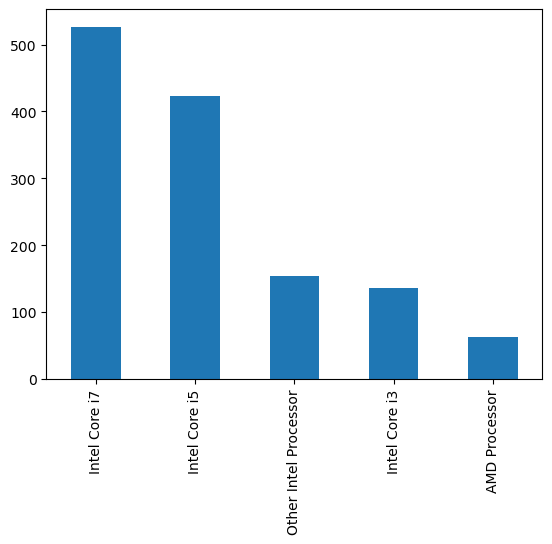

In [ ]:
df['Processor'].value_counts().plot(kind = 'bar')

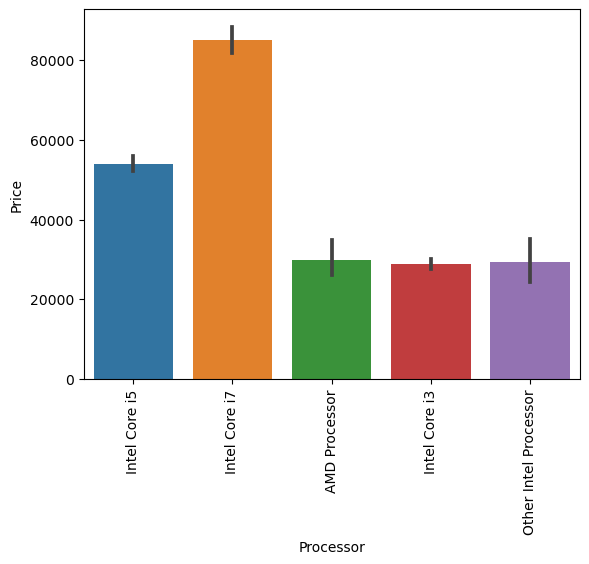

In [ ]:
sns.barplot(x = df['Processor'], y = df['Price']);
plt.xticks(rotation = 'vertical')
plt.show()

* As expected most of laptops sold are intel core i7
* when checked correlation with price, we can see that there is some relation
* Intel core i7 has the highest price while AMD, Intel core i3 and Other intel processors have the almost the same price range

* since we have extracted all the information from cpu and cpu name column, we will drop them.

In [ ]:
df = df.drop(columns = ['cpu name','Cpu'], axis = 1)

In [ ]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Processor
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


#### Analysisng RAM column

<Axes: >

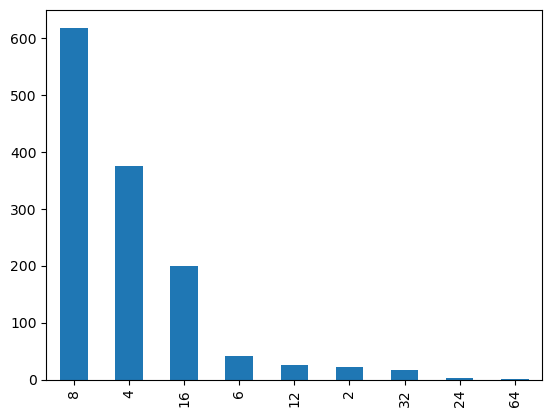

In [ ]:
df['Ram'].value_counts().plot(kind ='bar')

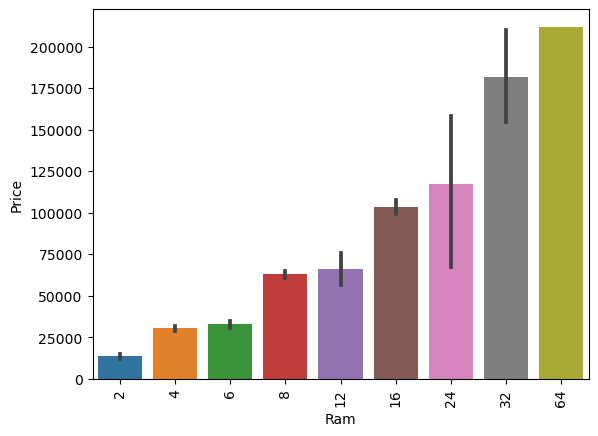

In [ ]:
sns.barplot(x = df['Ram'], y = df['Price']);
plt.xticks(rotation = 'vertical')
plt.show()

* As expected, most sold laptops have 8gb ram.
* There is also a clear linear relation with price and ram, more ram higher is the price

#### Feature Engineering 'Memory' column

In [ ]:
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Processor
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


In [ ]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

* Again lot of information in a single column.
* Lot of variation is present which is not good when model building
* HDD, SSD, Flash Storage and Hybrid Memory can be seen --> sometimes in combination, sometimes either is present out of 4

* step1 - Remove 'GB' and replace 'TB' with 1000.
* step2 - Split the columns where there is '+'. Making new dataframe to store these values.
* step3 - Make new columns named 'first' and 'second' t0 store these values.
* step4 - Extracting SSD, HDD, Flash and Hybrid from both of these columns.
--- step 4 makes 4 new columns assigning 1 to any kind of memory present and 0 for the absence.
* step5 - Make final columns named HDD, SSD, Flash Storage, Hybrid by applying math function.
* step6 - Since all the extraction is done, drop Memory column along with other created columns.

In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]


df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\yasha\AppData\Local\Temp\ipykernel_672\1276071472.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\yasha\AppData\Local\Temp\ipykernel_672\1276071472.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [ ]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Processor,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
df.drop(columns = ['Memory'], inplace = True)

In [ ]:
df.corr()["Price"]

C:\Users\yasha\AppData\Local\Temp\ipykernel_672\1734695575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

* Correlation of price with Hybrid, Flash storage and HDD is very low
* Dropping Hybrid and Flash storage but keeping HDD

In [ ]:
df.drop(columns = ['Hybrid', 'Flash_Storage'], inplace = True)

#### Extracting and Analysing information from 'Gpu'

In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620             281
Intel HD Graphics 520             185
Intel UHD Graphics 620             68
Nvidia GeForce GTX 1050            66
Nvidia GeForce GTX 1060            48
Nvidia GeForce 940MX               43
AMD Radeon 530                     41
Intel HD Graphics 500              39
Intel HD Graphics 400              37
Nvidia GeForce GTX 1070            30
Intel HD Graphics                  29
Nvidia GeForce GTX 1050 Ti         28
AMD Radeon R5 M430                 22
Nvidia GeForce 930MX               20
AMD Radeon 520                     17
Nvidia GeForce MX150               15
Intel HD Graphics 515              15
Intel HD Graphics 615              14
AMD Radeon R7 M445                 14
Nvidia GeForce GTX 960M            14
Nvidia GeForce 920MX               13
Intel HD Graphics 505              12
AMD Radeon R5                      11
Nvidia GeForce GTX 980M            10
Intel HD Graphics 405               9
Nvidia Quadro M1200                 9
AMD Radeon R

* Again a lot of varieties which will affect r2 score.
* Reduce variation by extracting brand name from gpu column.

In [ ]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [ ]:
df = df[df['Gpu Brand'] != 'ARM']

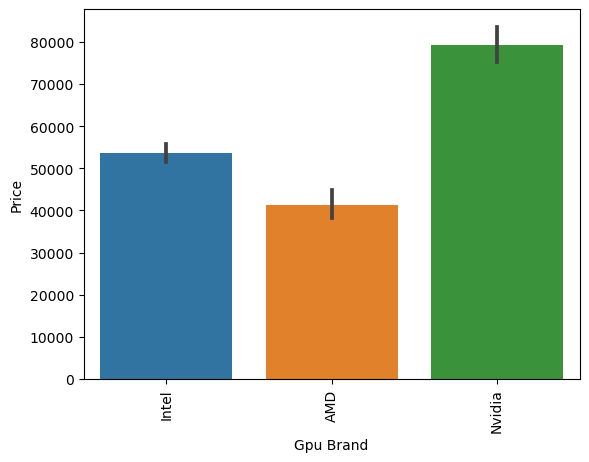

In [ ]:
sns.barplot(x = df['Gpu Brand'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

* Correlation with price shows Nvidia is priced at the highest followed by Intel and AMD.

In [ ]:
df.drop(columns = ['Gpu'], inplace = True)

#### Extracting and Analysing 'OpSys' columns

In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

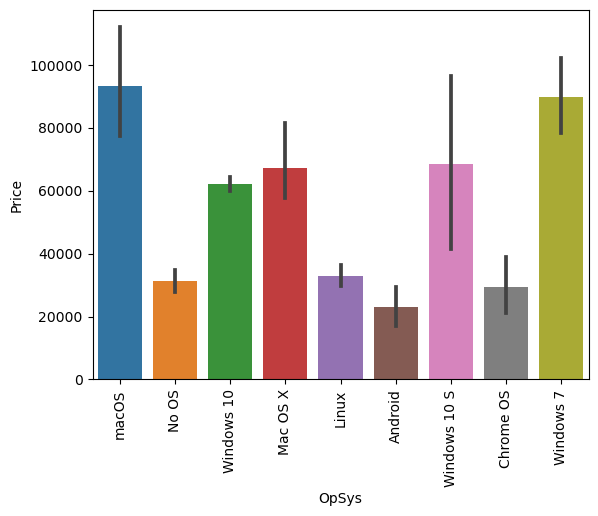

In [ ]:
sns.barplot(x= df.OpSys, y = df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

* As expected mac is priced at highest which is just slightly more than windows 7.
* There are too many categories.
* Reduce categories into 3 to improve model.

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Processor,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
df.drop(columns = ['OpSys'], inplace = True)

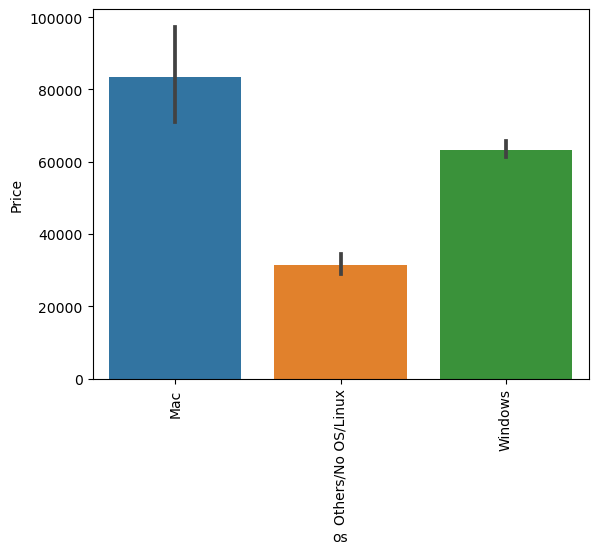

In [ ]:
sns.barplot(x= df.os, y = df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

#### Analysing 'Weight' column

<Axes: xlabel='Weight', ylabel='Count'>

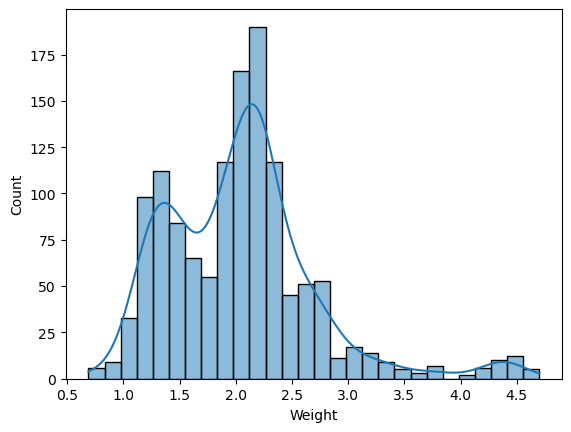

In [ ]:
sns.histplot(df['Weight'], kde = True)

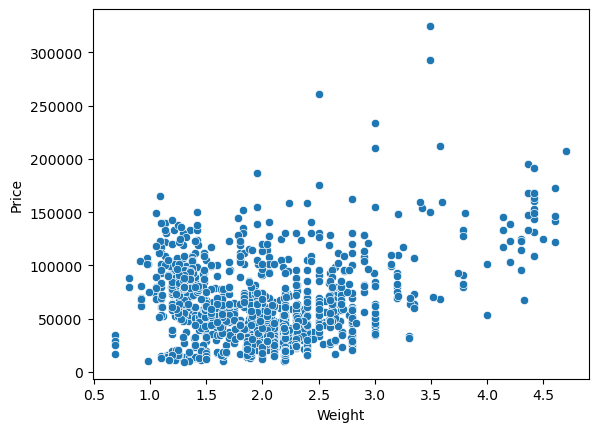

In [ ]:
sns.scatterplot(x = df.Weight, y = df.Price);

* Direct relation cannot be seen

* All independent variable hav been dealt with.
* Plotting heatmap to see where correlation is most

C:\Users\yasha\AppData\Local\Temp\ipykernel_672\2460615548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


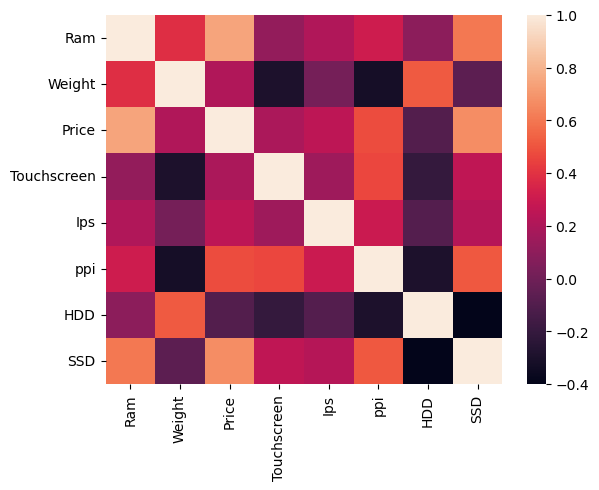

In [ ]:
sns.heatmap(df.corr());

* since our target variable is slightly skewed we will apply log function

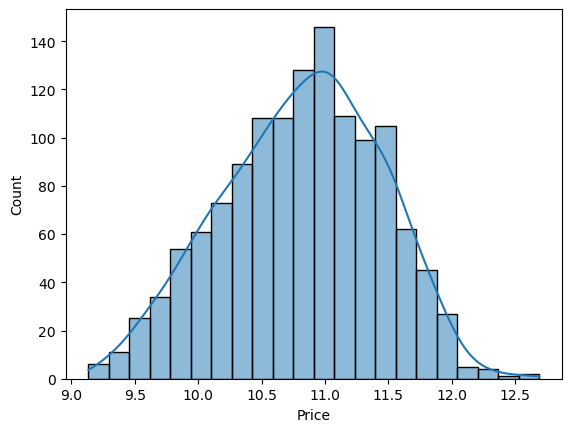

In [ ]:
sns.histplot(np.log(df.Price), kde = True);

#### Sampling --> spliting data in x and y

In [ ]:
x = df.drop(columns = ['Price'])
y = np.log(df.Price)

In [ ]:
x.shape

(1302, 12)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [ ]:
x_train.head(2)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Processor,HDD,SSD,Gpu Brand,os
91,Acer,Notebook,8,2.2,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
863,Lenovo,Gaming,8,2.5,0,1,141.211998,Intel Core i5,1000,0,Nvidia,Others/No OS/Linux


In [ ]:
y_train.head(2)

91     10.510802
863    10.900173
Name: Price, dtype: float64

#### Applying OneHotEncoder to handle non numeric columns

* Importing all the necessary functions
* I have used column transformer and pipeline to build my model in 1 step
* Building model on Linerar reg, Decision Tree, Random Forest, SVM, Gradient Boost, KNN

#### Importing all the necessary libraries and functions

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
x_train.head(2)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Processor,HDD,SSD,Gpu Brand,os
91,Acer,Notebook,8,2.2,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
863,Lenovo,Gaming,8,2.5,0,1,141.211998,Intel Core i5,1000,0,Nvidia,Others/No OS/Linux


#### Linear Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop ='first'),[0,1,7,10,11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2_score', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))

r2_score 0.800240596385732
mae 0.20453995809076045


#### Ridge Regression

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(
        sparse_output=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = Ridge(alpha = 10)

pipe = Pipeline([('step1',step1),
                  ('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2_score', r2_score(y_pred,y_test))
print('MAE', mean_absolute_error(y_pred,y_test))

R2_score 0.7670271235450231
MAE 0.20379724326699938


#### Lasso Regression

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf',
                                        OneHotEncoder(sparse_output=False,drop = 'first'),[0,1,7,10,11])],
                                         remainder = 'passthrough')

step2 = Lasso(alpha = 0.001)

pipe = Pipeline([('step1',step1),
                  ('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.7980036908146437
MAE 0.20604038232747507


#### KNN

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf',
                                        OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],
                                        remainder = 'passthrough')

step2 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([('step1',step1),
                  ('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.790946074540896
MAE 0.20204067422814023


#### Decision Tree

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf',
                                        OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],
                                        remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([('step1',step1),
                  ('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.8012917978624908
MAE 0.19936275804419468


#### Random Forest

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf',
                                        OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],
                                        remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=20)

pipe = Pipeline([('step1',step1),
                  ('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.86687155154199
MAE 0.1648500746246564


#### Gradient Boost

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf',
                                        OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],
                                        remainder = 'passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([('step1',step1),
                  ('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.8631645564227596
MAE 0.16342496526600223


#### XgBoost

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf',
                                        OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],
                                        remainder = 'passthrough')

step2 = XGBRegressor(n_estimators= 45,
                     max_depth = 5,
                     learning_rate = 0.5)

pipe = Pipeline([('step1',step1),
                  ('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.8567622649053191
MAE 0.16620902434335433


#### After building the model in differnet algorithms, it is clear that Random Forest Regressor gives the best r2_score